## Importing All Required Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [16]:
algorithms = ['LR', 'SVM', 'RF', 'XGB', 'CNN', 'LSTM', 'CNN-LSTM', 'SARIMAX', 'FBProphet']
mse_tts = [0.168, 0.167, 0.415, 0.614, 6.372, 1.879, 11.416, 0.846, 193.277]
mse_f80 = [0.653, 0.660, 2365.704, 2773.901, 197.659, 34.076, 2234.370, 9.485, 193.277]

rmse_tts = [0.410, 0.409, 0.644, 0.784, 2.524, 1.371, 3.378, 0.920, 13.902]
rmse_f80 = [0.808, 0.812, 48.638, 52.667, 14.059, 5.837, 47.269, 3.079, 13.902]

mae_tts = [0.218, 0.217, 0.325, 0.374, 1.747, 0.741, 2.853, 0.768, 10.923]
mae_f80 = [0.626, 0.630, 41.600, 46.262, 13.114, 4.745, 40.717, 2.689, 10.923]

training_time = [0.023, 1.283, 2.320, 2.679, 131.116, 1934.98, 201.006, 39.909, 6.552]

In [17]:
df =  pd.DataFrame({'Algorithms': algorithms,
                   'MSE_TTS': mse_tts,
                   'MSE_F80': mse_f80,
                   'RMSE_TTS': rmse_tts,
                   'RMSE_F80': rmse_f80,
                   'MAE_TTS': mae_tts,
                   'MAE_F80': mae_f80,
                   'Training_Time': training_time},
                   columns = ['Algorithms', 'MSE_TTS', 'MSE_F80', 'RMSE_TTS', 'RMSE_F80', 'MAE_TTS', 'MAE_F80', 'Training_Time'])
df

,Algorithms,MSE_TTS,MSE_F80,RMSE_TTS,RMSE_F80,MAE_TTS,MAE_F80,Training_Time
0,LR,0.168,0.653,0.410,0.808,0.218,0.626,0.023
1,SVM,0.167,0.660,0.409,0.812,0.217,0.630,1.283
2,RF,0.415,2365.704,0.644,48.638,0.325,41.600,2.320
3,XGB,0.614,2773.901,0.784,52.667,0.374,46.262,2.679
4,CNN,6.372,197.659,2.524,14.059,1.747,13.114,131.116
5,LSTM,1.879,34.076,1.371,5.837,0.741,4.745,1934.980
6,CNN-LSTM,11.416,2234.370,3.378,47.269,2.853,40.717,201.006
7,SARIMAX,0.846,9.485,0.920,3.079,0.768,2.689,39.909
8,FBProphet,193.277,193.277,13.902,13.902,10.923,10.923,6.552


In [18]:
df.set_index('Algorithms', inplace=True)

In [19]:
df

,MSE_TTS,MSE_F80,RMSE_TTS,RMSE_F80,MAE_TTS,MAE_F80,Training_Time
Algorithms,,,,,,,
LR,0.168,0.653,0.410,0.808,0.218,0.626,0.023
SVM,0.167,0.660,0.409,0.812,0.217,0.630,1.283
RF,0.415,2365.704,0.644,48.638,0.325,41.600,2.320
XGB,0.614,2773.901,0.784,52.667,0.374,46.262,2.679
CNN,6.372,197.659,2.524,14.059,1.747,13.114,131.116
LSTM,1.879,34.076,1.371,5.837,0.741,4.745,1934.980
CNN-LSTM,11.416,2234.370,3.378,47.269,2.853,40.717,201.006
SARIMAX,0.846,9.485,0.920,3.079,0.768,2.689,39.909
FBProphet,193.277,193.277,13.902,13.902,10.923,10.923,6.552


### Training Time for different machine learning and deep learning algorithms

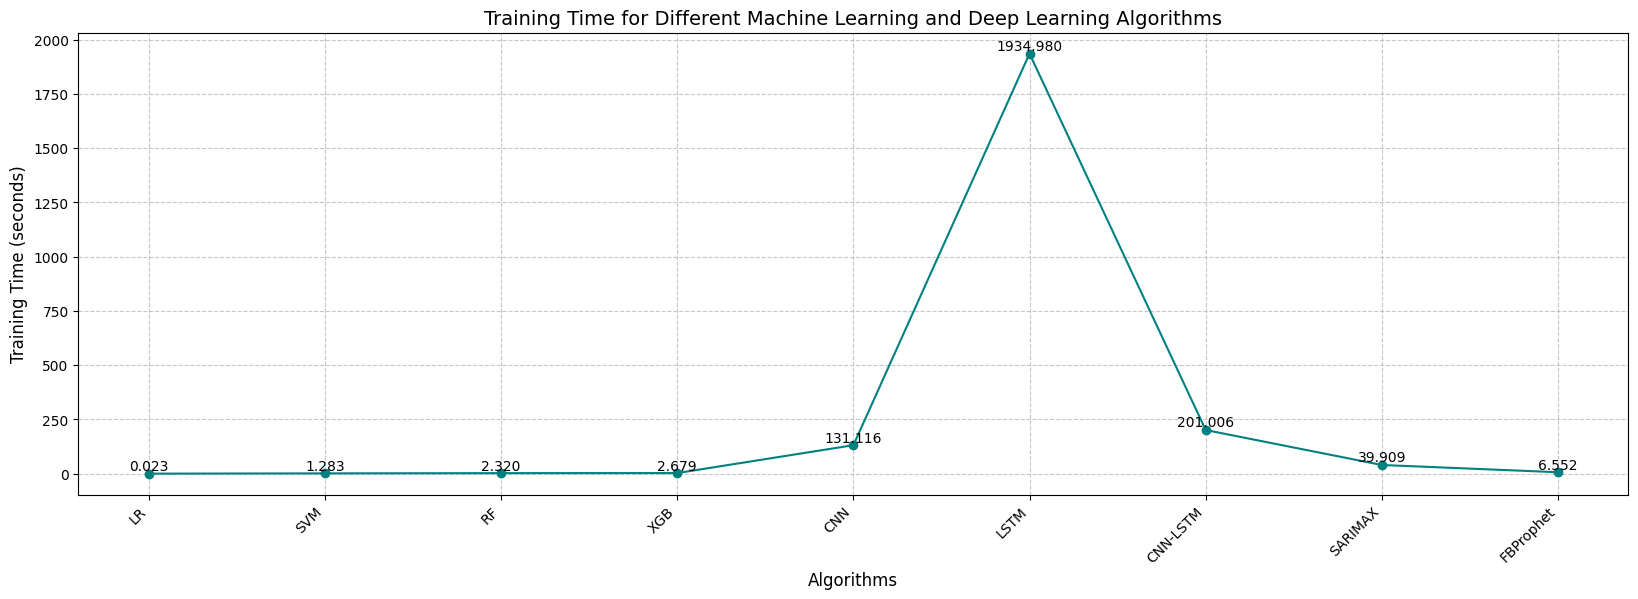

In [20]:
plt.figure(figsize=(20, 6))
plt.plot(df.Training_Time, marker = 'o', color = 'teal', linestyle='-', label='Training Time')

for i, time in enumerate(df.Training_Time):
    plt.text(i, time + 15, f'{time:.3f}', ha='center', fontsize=10)  # Adjust `+1` for spacing

plt.xticks(rotation=45)
plt.title('Training Time for Different Machine Learning and Deep Learning Algorithms', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.xlabel('Algorithms', fontsize=12)
plt.ylabel('Training Time (seconds)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

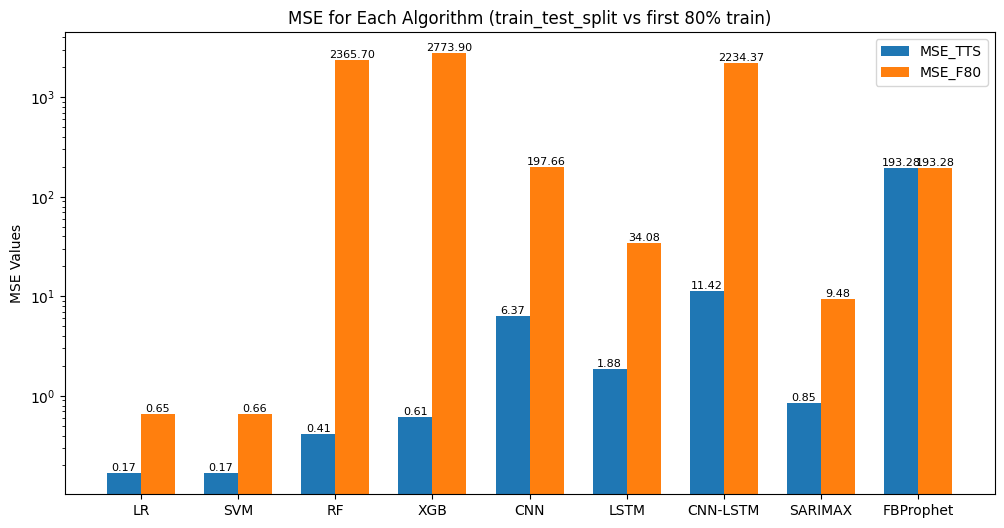

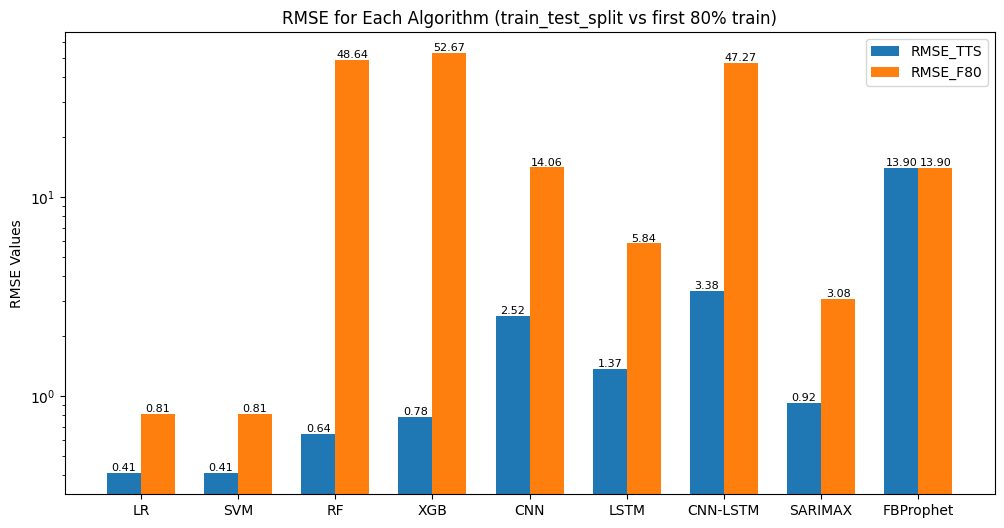

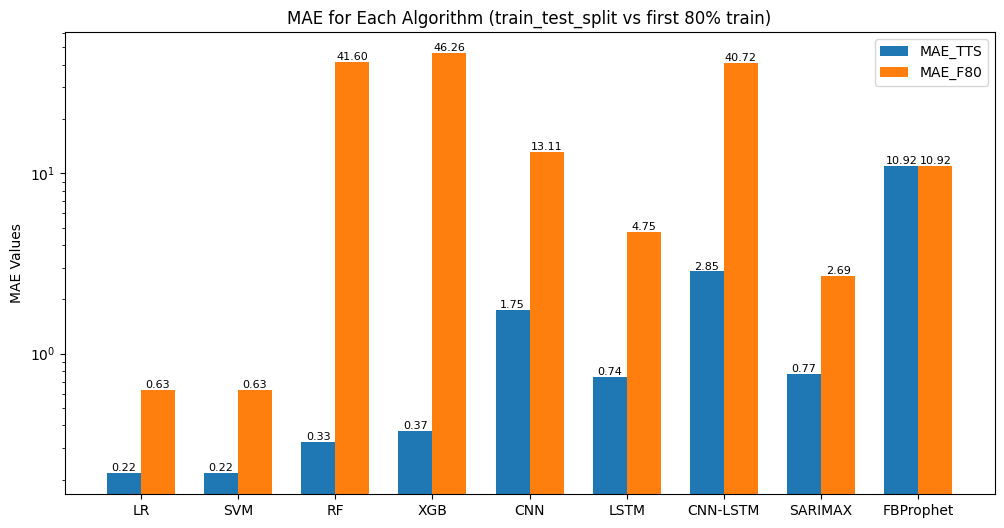

In [21]:
# Plotting individual figures with y-axis adjustment and value annotations
# Set bar width
bar_width = 0.35
x = np.arange(len(algorithms))

# Function to add values on top of bars
def add_values_on_bars(ax, bars):
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=8)

# Figure 1: MSE
fig1, ax1 = plt.subplots(figsize=(12, 6))
bars1 = ax1.bar(x - bar_width/2, mse_tts, bar_width, label='MSE_TTS')
bars2 = ax1.bar(x + bar_width/2, mse_f80, bar_width, label='MSE_F80')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MSE for Each Algorithm (train_test_split vs first 80% train)')
ax1.set_ylabel('MSE Values')
ax1.set_yscale('log')  # Adjust for visibility of smaller values
ax1.legend()
add_values_on_bars(ax1, bars1)
add_values_on_bars(ax1, bars2)
plt.show()

# Figure 2: RMSE
fig2, ax2 = plt.subplots(figsize=(12, 6))
bars1 = ax2.bar(x - bar_width/2, rmse_tts, bar_width, label='RMSE_TTS')
bars2 = ax2.bar(x + bar_width/2, rmse_f80, bar_width, label='RMSE_F80')
ax2.set_xticks(x)
ax2.set_xticklabels(algorithms)
ax2.set_title('RMSE for Each Algorithm (train_test_split vs first 80% train)')
ax2.set_ylabel('RMSE Values')
ax2.set_yscale('log')  # Adjust for visibility of smaller values
ax2.legend()
add_values_on_bars(ax2, bars1)
add_values_on_bars(ax2, bars2)
plt.show()

# Figure 3: MAE
fig3, ax3 = plt.subplots(figsize=(12, 6))
bars1 = ax3.bar(x - bar_width/2, mae_tts, bar_width, label='MAE_TTS')
bars2 = ax3.bar(x + bar_width/2, mae_f80, bar_width, label='MAE_F80')
ax3.set_xticks(x)
ax3.set_xticklabels(algorithms)
ax3.set_title('MAE for Each Algorithm (train_test_split vs first 80% train)')
ax3.set_ylabel('MAE Values')
ax3.set_yscale('log')  # Adjust for visibility of smaller values
ax3.legend()
add_values_on_bars(ax3, bars1)
add_values_on_bars(ax3, bars2)
plt.show()